# Introduction

This report presents the results of an A/B test conducted on behalf of a big online store and evaluates the merit of several hypotheses planned to be tested in the future. 

Based on the RICE framework, I came to the conclusion that a **1) subscription form** on the main pages, **2) product recommendation blocks** on various pages and **3) two new traffic channels** are likely to boost conversion in the future. 

The results of the A-B test showed that the B-variant of the website led to significantly more **conversions** than the A-variant. In contrast, this can not be said about **average purchase size**. However, average purchase size of group B has not yet fully stabilised, so it could make sense to keep testing for another few weeks to come to more conclusive results.

# Part 1. Prioritizing Hypotheses

## Data Preprocessing

In [1]:
import pandas as pd 
pd.set_option('max_colwidth', 400) 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import math as mt 
import matplotlib.ticker as mtick
import scipy.stats as st 
import sys
import warnings
import datetime as dt

if not sys.warnoptions:
    warnings.simplefilter("ignore")

try: 
    hypos= pd.read_csv("hypotheses_us.csv", sep= ';')
    orders= pd.read_csv("orders_us.csv")
    visits= pd.read_csv("visits_us.csv")
except:
    hypos= pd.read_csv("/datasets/hypotheses_us.csv", sep= ';')
    orders= pd.read_csv("/datasets/orders_us.csv")
    visits= pd.read_csv("/datasets/visits_us.csv")
    
hypos.name= 'Hypotheses'
orders.name= 'Orders'
visits.name= 'Visits'

datasets= [hypos, orders, visits]
start= '\033[1m'
end= '\033[0;0m'

for i in datasets: 
    print(start+i.name+end)
    print(i.info())   
    display(i.head(5))

Hypotheses
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [2]:
hypos.columns= hypos.columns.str.lower()

orders['date']= pd.to_datetime(orders['date'])
orders['date']= orders['date'].dt.strftime('%Y-%m-%d')
visits['date']= pd.to_datetime(visits['date'])

## Which hypotheses should be prioritised? 

In the following part, I'm going to use the ICE and RICE frameworks to assess the relative importance of several proposed hypotheses

In [3]:
hypos['ICE']= hypos['impact']*hypos['confidence']/hypos['effort']
hypos['RICE']= hypos['reach']*hypos['impact']*hypos['confidence']/hypos['effort']
print(start + 'Hypotheses sorted by ICE:' + end)
display(hypos.sort_values('ICE', ascending= False))
print(start + 'Hypotheses sorted by RICE:' + end)
display(hypos.sort_values('RICE', ascending= False))

Hypotheses sorted by ICE:


,hypothesis,reach,impact,confidence,effort,ICE,RICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


Hypotheses sorted by RICE:


,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


Based on the ICE framework, the three most promising hypotheses are: 
1. Launch a promotion that gives users discounts on their birthdaysdiscounts on a user's birthday 
2. Add two new channels for attracting traffic
3. Add a subscription form to all the main pages.

When applying RICE the three most important hypotheses are: 
1. Add a subscription form to all the main pages. This will help you compile a mailing list 	
2. Add product recommendation blocks to the store's site. This will increase conversion and average purchase size 	
3. Add two new channels for attracting traffic. This will bring 30% more users 	

The highest-ranked hypothesis from ICE is only the fifth best option according to RICE. In general, there has been a considerable reshuffling of priorities. This is due to sensitivity to the reach parameter whose ranking differs from the other ones. 

# Part2. A/B Test Analysis

Now, I'm going to present the results of the A/B test that was run in the last month. The test compared two different variants of the website to see if they differ in their impact on the conversion rate and the average purchase size. 

### Cumulative Revenue by Group

In [4]:
# This removes the visitors that are in both groups 
a= list(orders.query('group == "A"')['visitorId'])
b= list(orders.query('group == "B"')['visitorId'])
sonst= list(orders['visitorId'].unique())

common= [x for x in sonst if x in a and x in b]

orders= orders.query('visitorId not in @common')

In [5]:
cum_rev= orders.pivot_table(index= 'date', columns= 'group', values= 'revenue',\
                   aggfunc= 'sum').cumsum(axis=0)
cum_rev.columns= ['A_rev','B_rev']

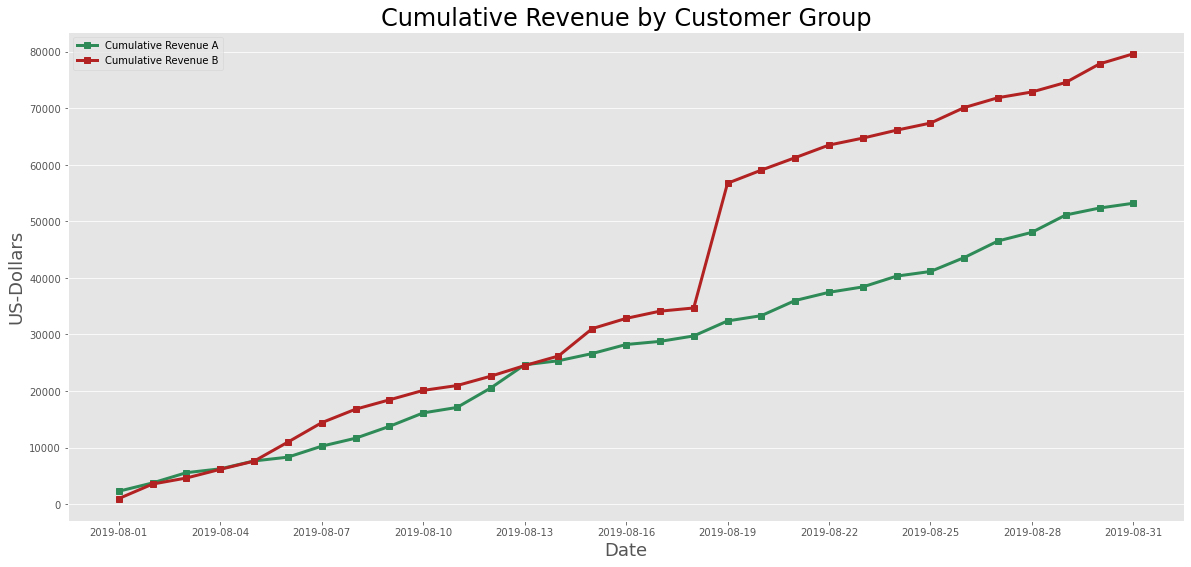

In [6]:
fig, ax= plt.subplots(figsize= (20,9))
x= np.arange(0,len(cum_rev),3)
labels= list(cum_rev.index.values)

A_rev= ax.plot(labels, cum_rev['A_rev'],'s-', label= 'Cumulative Revenue A',linewidth= 3,\
               color= 'seagreen')
B_rev= ax.plot(labels, cum_rev['B_rev'],'s-', label= 'Cumulative Revenue B',linewidth= 3,
               color= 'firebrick')
ax.xaxis.grid()
ax.set_xticks(x)
ax.legend()
ax.set_ylabel('US-Dollars', size= 18)
ax.set_xlabel('Date', size= 18)
plt.title('Cumulative Revenue by Customer Group', size= 24)
plt.show()

The cumulative revenue for group A is almost 50% lower than for group B. However, there was a huge increase between the 18 and 19 August. This indicates that we probably have a very abnormal user in the dataset. 
This will be considered in the subsequent analysis and tests will be run with both the raw dataset and a compressed dataset without the outliers. 

### Cumulative Average Purchase Size by Group

In [7]:
num_of_users= orders.pivot_table(columns= 'group', values= 'visitorId',\
                                 aggfunc= 'nunique')
cum_rev['A_number']= num_of_users['A'][0]
cum_rev['B_number']= num_of_users['B'][0]
cum_rev['cum_averageA']= cum_rev['A_rev']/cum_rev['A_number']
cum_rev['cum_averageB']= cum_rev['B_rev']/cum_rev['B_number']

In [8]:
cum_average= orders.groupby(['group', 'date']).agg({'visitorId':'nunique','revenue':'sum'}).reset_index()
cum_averageA= cum_average.query('group == "A"')
cum_averageA['cum_rev']= cum_averageA['revenue'].cumsum()
cum_averageB= cum_average.query('group == "B"')
cum_averageB['cum_rev']= cum_averageB['revenue'].cumsum()
cum_averageA['cum_users']= cum_averageA['visitorId'].cumsum()
cum_averageB['cum_users']= cum_averageB['visitorId'].cumsum()
cum_averageA['cum_avg']= cum_averageA['cum_rev']/cum_averageA['cum_users']
cum_averageB['cum_avg']= cum_averageB['cum_rev']/cum_averageB['cum_users']

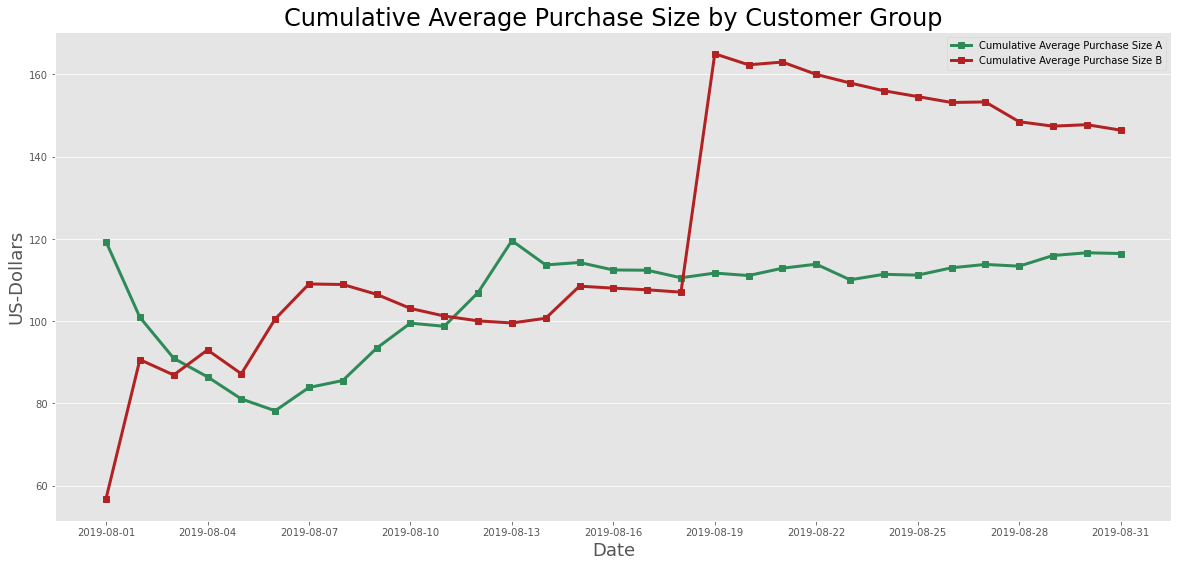

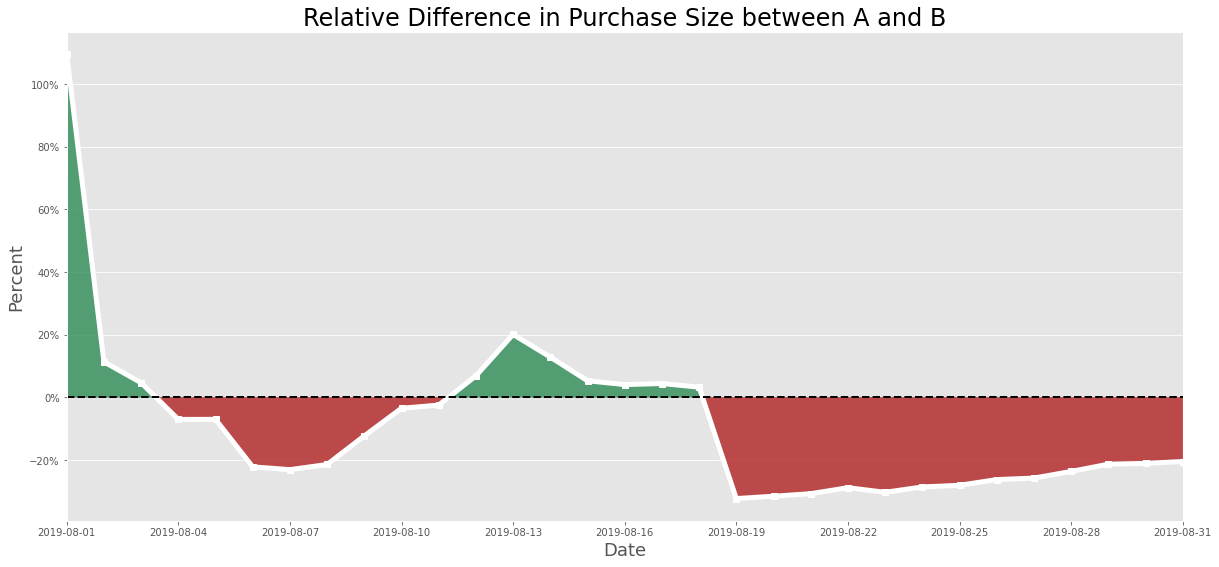

In [9]:
fig, ax= plt.subplots(figsize= (20,9))
A_rev= ax.plot(labels, cum_averageA['cum_avg'],'s-', label= 'Cumulative Average Purchase Size A', linewidth= 3,\
              color= 'seagreen')
B_rev= ax.plot(labels, cum_averageB['cum_avg'],'s-', label= 'Cumulative Average Purchase Size B',linewidth= 3,\
              color= 'firebrick')
ax.xaxis.grid()
ax.set_xticks(x)
ax.legend()
ax.set_ylabel('US-Dollars', size= 18)
ax.set_xlabel('Date', size= 18)
plt.title('Cumulative Average Purchase Size by Customer Group', size= 24)
plt.show()
fig, ax= plt.subplots(figsize= (20,9))
A=cum_averageA['cum_avg']
B=cum_averageB['cum_avg'].reset_index(drop= True)
rel_diff= ((A/B)-1)*100
A_rev= ax.plot(labels,rel_diff,'s-', color= 'white', alpha= 1, linewidth= 5)
ax.xaxis.grid()
ax.set_xticks(x)
ax.axhline(linestyle= '--', linewidth= 2, color= 'black')
ax.set_ylabel('Percent', size= 18)
ax.set_xlabel('Date', size= 18)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.fill_between(labels,0,rel_diff,where=(rel_diff <0),alpha= 0.8, color= 'firebrick',interpolate=True)
ax.fill_between(labels,0,rel_diff,where=(rel_diff >0),alpha= 0.8, color= 'seagreen',interpolate=True)
plt.xlim(min(labels),max(labels))
plt.title('Relative Difference in Purchase Size between A and B', size= 24)
plt.show()

The average purchase size of B is remarkably higher than that of B. The relative difference plot shows that the B group has fared much better towards the end of the regarded period with a peak difference of more than 30%. However, the value of B, mainly due to the aformentioned outlier, has not yet stabilized so it would be too early to draw conclusions from this sample. 

### Conversion Rates 

In [13]:
visitsA= visits.query('group=="A"').reset_index(drop= True)
visitsB= visits.query('group=="B"').reset_index(drop= True)
no_orders= orders.groupby(['group', 'date']).agg({'transactionId':'nunique'}).reset_index()
no_ordersA= no_orders.query('group== "A"').reset_index(drop= True)
no_ordersB= no_orders.query('group== "B"').reset_index(drop= True)

#cum_averageA['date']= pd.to_datetime(cum_averageA['date'])
#cum_averageB['date']= pd.to_datetime(cum_averageB['date'])
no_ordersA['date']= pd.to_datetime(no_ordersA['date'])
no_ordersB['date']= pd.to_datetime(no_ordersB['date'])

conversionA= visitsA.merge(no_ordersA, on = ['date', 'group'])

conversionB= visitsB.merge(no_ordersB, on = ['date', 'group'])

conversionA.columns= ['date', 'group', 'visits', 'orders']
conversionB.columns= ['date', 'group', 'visits', 'orders']

In [14]:
conversionA['conversion_rate']= conversionA['orders']/conversionA['visits']
conversionB['conversion_rate']= conversionB['orders']/conversionB['visits']
conversionA['cum_visits']= conversionA['visits'].cumsum()
conversionB['cum_visits']= conversionB['visits'].cumsum()
conversionA['cum_orders']= conversionA['orders'].cumsum()
conversionB['cum_orders']= conversionB['orders'].cumsum()

conversionA['cum_conversion_rate']= conversionA['cum_orders']/conversionA['cum_visits']

conversionB['cum_conversion_rate']= conversionB['cum_orders']/conversionB['cum_visits']

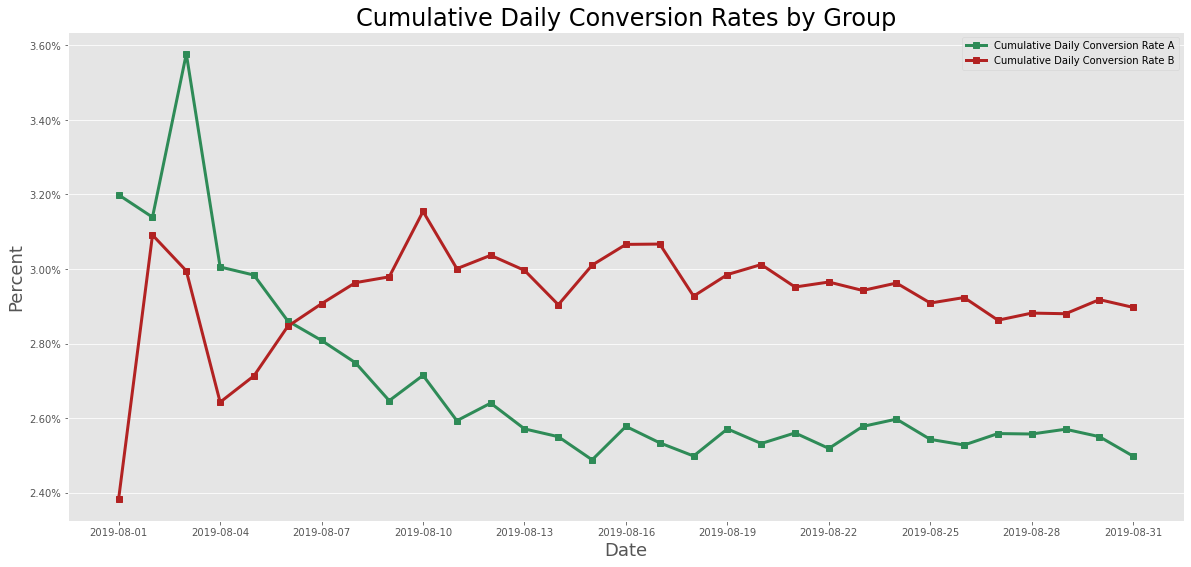

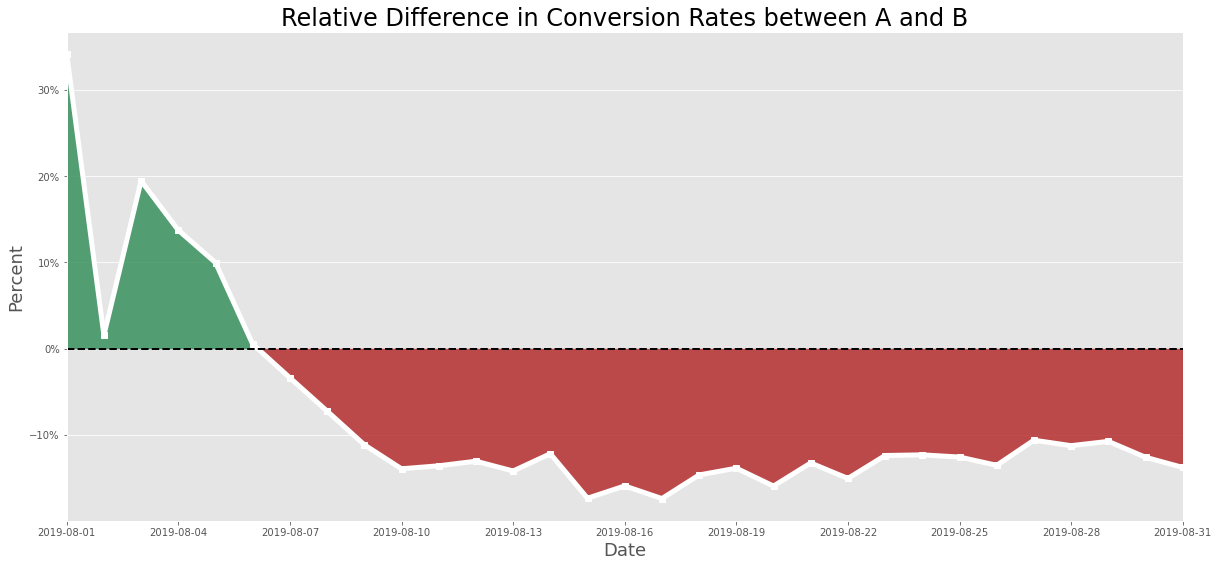

In [15]:
fig, ax= plt.subplots(figsize= (20,9))

cum_convplotA= ax.plot(labels, conversionA['cum_conversion_rate']*100,'s-',label= 'Cumulative Daily Conversion Rate A',\
                  linewidth= 3, color= 'seagreen')
cum_convplotB= ax.plot(labels, conversionB['cum_conversion_rate']*100,'s-',label= 'Cumulative Daily Conversion Rate B',\
                  linewidth= 3, color= 'firebrick')
ax.set_xticks(x)
ax.set_ylabel('Percent', size= 18)
ax.set_xlabel('Date', size= 18)
ax.xaxis.grid()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.legend()
plt.title('Cumulative Daily Conversion Rates by Group', size= 24)
plt.show()

fig, ax= plt.subplots(figsize= (20,9))
rel_diff= ((conversionA['cum_conversion_rate']/conversionB['cum_conversion_rate'])-1)*100
A_rev= ax.plot(labels,rel_diff,'s-', color= 'white', alpha= 1, linewidth= 5)
ax.xaxis.grid()
ax.set_xticks(x)
ax.axhline(linestyle= '--', linewidth= 2, color= 'black')
ax.set_ylabel('Percent', size= 18)
ax.set_xlabel('Date', size= 18)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.fill_between(labels,0,rel_diff,where=(rel_diff <0),alpha= 0.8, color= 'firebrick',interpolate=True)
ax.fill_between(labels,0,rel_diff,where=(rel_diff >0),alpha= 0.8, color= 'seagreen',interpolate=True)
plt.xlim(min(labels),max(labels))
plt.title('Relative Difference in Conversion Rates between A and B', size= 24)
plt.show()

Also in terms of conversion rate, B is taking the lead over A. The average daily conversion rate is remarkably higher for B than for A (by 13.78% at the end of the test). 

### Number of Orders per User 

In this part, I'm going to present scatterplots with the number of orders per user on the y axis and the 'user index' on the x-axis. The aim of this part to determine which users can be classified as anomalous. To that end the 95th and 99th percentiles are added as lines to the plots to determine reasonable cutoff points. Note that this does not include users who didn't make a purchase since the vast majority of users did not make any purchases. 

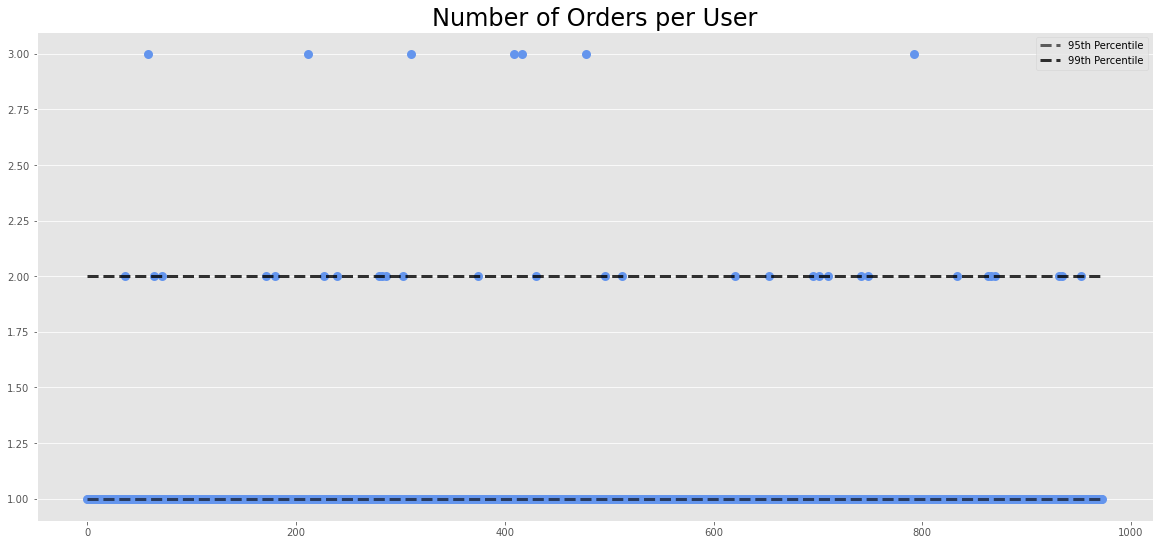

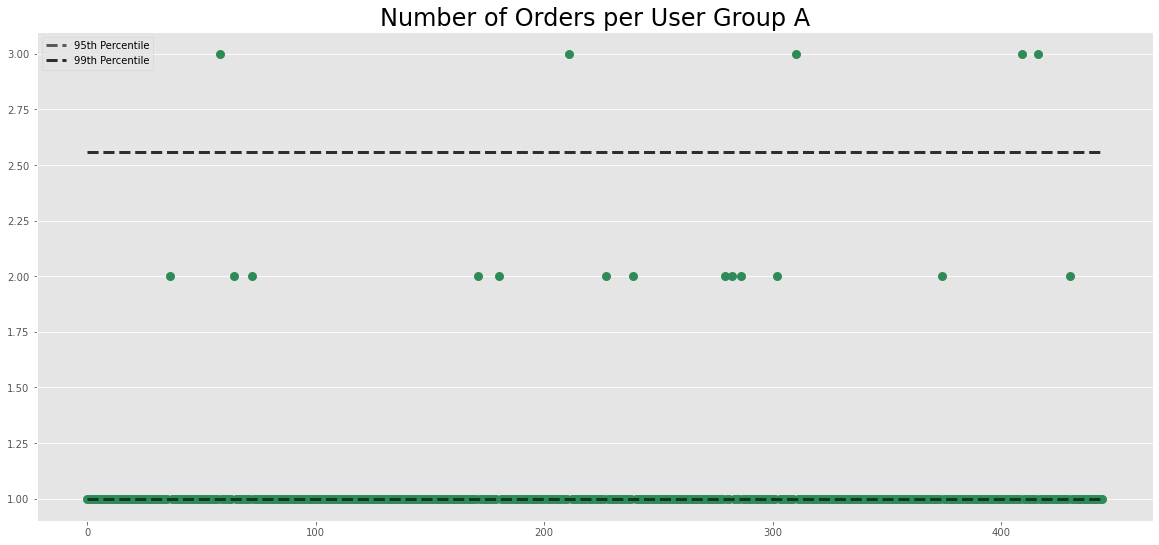

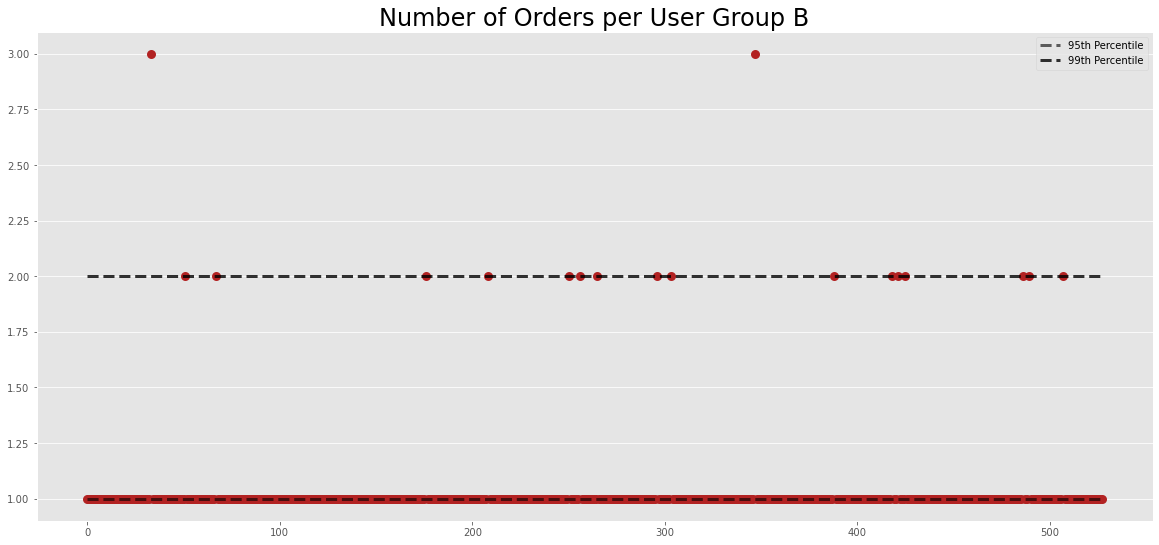

In [187]:
## Optional: If all users are to be considered you can uncomment the code below 
orders_per_user= orders.groupby(['group','visitorId']).agg({'transactionId':'nunique'}).reset_index()

orders_per_user.columns= ['group', 'visitor','orders']

#orders_per_user= orders_per_user[['group', 'orders']]
#for name, group in visits.groupby('group'):
#    add= int(group['visits'].sum())
#    extra= pd.DataFrame({'group':np.repeat(name,add),
#                        'orders': np.repeat(0,add)})
#    orders_per_user= pd.concat([orders_per_user, extra],axis=0).reset_index(drop=True)
    

orders_per_userA= orders_per_user.query('group== "A"').reset_index(drop= True)
orders_per_userB= orders_per_user.query('group== "B"').reset_index(drop= True)


fig, ax= plt.subplots(figsize= (20,9))
y=np.arange(0,len(orders_per_user))

perc95= np.repeat(orders_per_user['orders'].quantile(0.95), len(orders_per_user))
perc99= np.repeat(orders_per_user['orders'].quantile(0.99), len(orders_per_user))

ax.plot(y, perc95, '--', color= 'black',alpha= 0.6, linewidth= 3,\
       label= '95th Percentile')
ax.plot(y, perc99, '--', color= 'black', alpha= 0.8,linewidth= 3,\
       label= '99th Percentile')
ax.scatter(y, orders_per_user['orders'], color= 'cornflowerblue',\
            linewidths= 3)
ax.xaxis.grid()
plt.title('Number of Orders per User', size= 24)
plt.legend()
plt.show()
fig, ax= plt.subplots(figsize= (20,9))
y=np.arange(0,len(orders_per_userA))

perc95A= np.repeat(orders_per_userA['orders'].quantile(0.95), len(orders_per_userA))
perc99A= np.repeat(orders_per_userA['orders'].quantile(0.99), len(orders_per_userA))

ax.plot(y, perc95A, '--', color= 'black',alpha= 0.6, linewidth= 3,\
       label= '95th Percentile')
ax.plot(y, perc99A, '--', color= 'black', alpha= 0.8,linewidth= 3,\
       label= '99th Percentile')
ax.scatter(y, orders_per_userA['orders'], color= 'seagreen',\
            linewidths= 3)
ax.xaxis.grid()
#plt.xlim(min(y),max(y))
plt.title('Number of Orders per User Group A', size= 24)
plt.legend()
plt.show()
fig, ax= plt.subplots(figsize= (20,9))
y=np.arange(0,len(orders_per_userB))

#plt.xlim(min(y),max(y))
perc95B= np.repeat(orders_per_userB['orders'].quantile(0.95), len(orders_per_userB))
perc99B= np.repeat(orders_per_userB['orders'].quantile(0.99), len(orders_per_userB))

ax.plot(y, perc95B, '--', color= 'black',alpha= 0.6, linewidth= 3,\
       label= '95th Percentile')
ax.plot(y, perc99B, '--', color= 'black', alpha= 0.8,linewidth= 3,\
       label= '99th Percentile')
ax.scatter(y, orders_per_userB['orders'], color= 'firebrick',\
            linewidths= 3)
ax.xaxis.grid()
plt.title('Number of Orders per User Group B', size= 24)
plt.legend()
plt.show()

From the upper graph it's clear that users who make more than one order per month are extraordinarily rare (99th percentile). When running the test with the filtered dataset, these users will be removed. 

### Order Prices 

The same analysis as above will now be done with regards to the purchcase size of the users. 

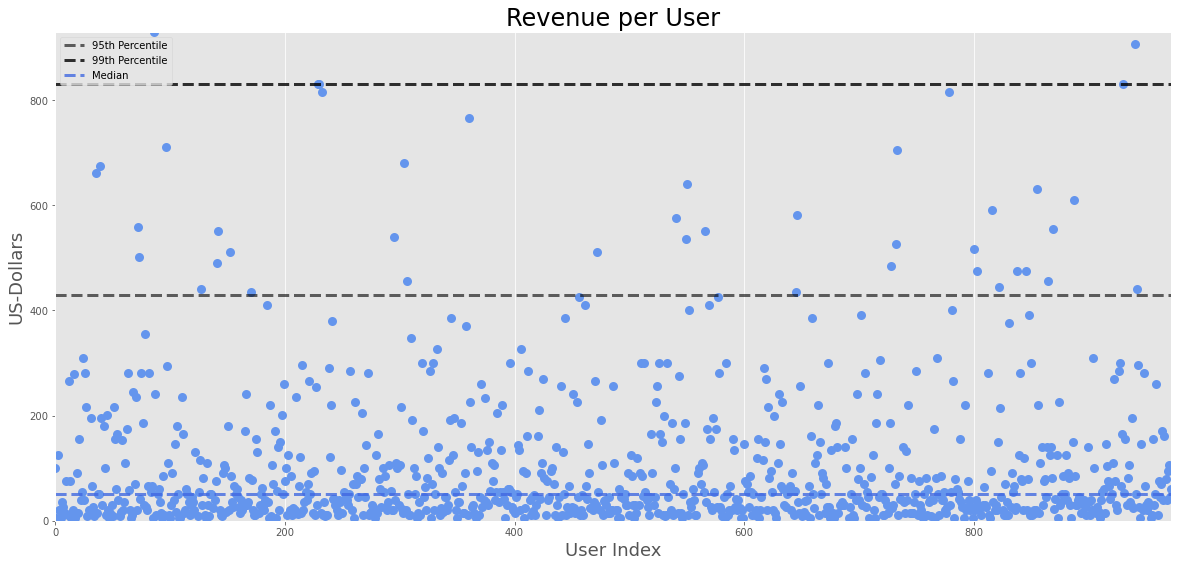

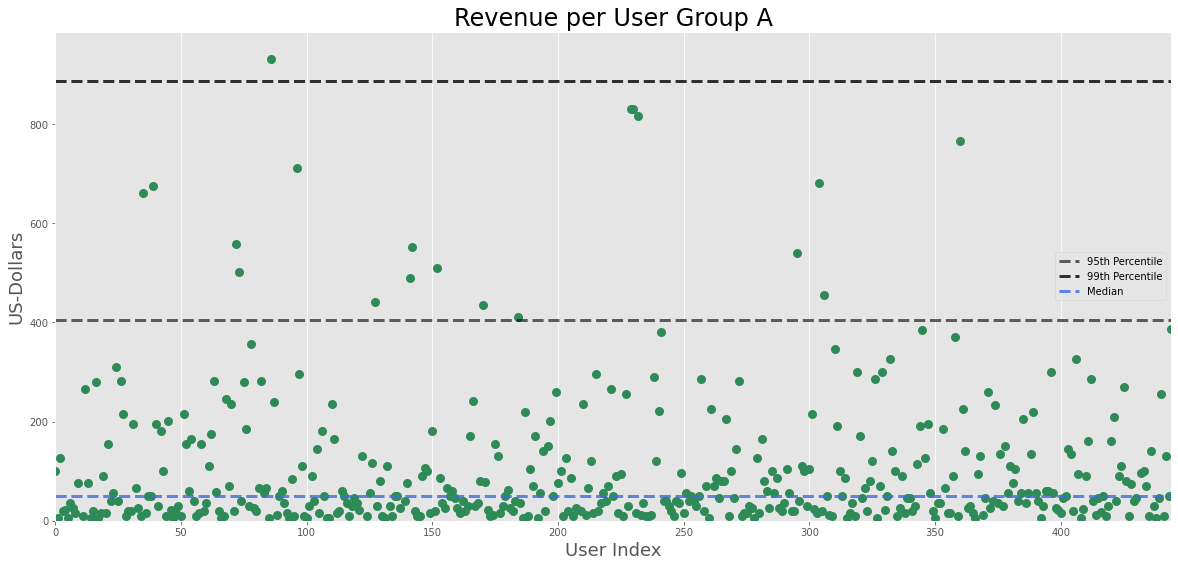

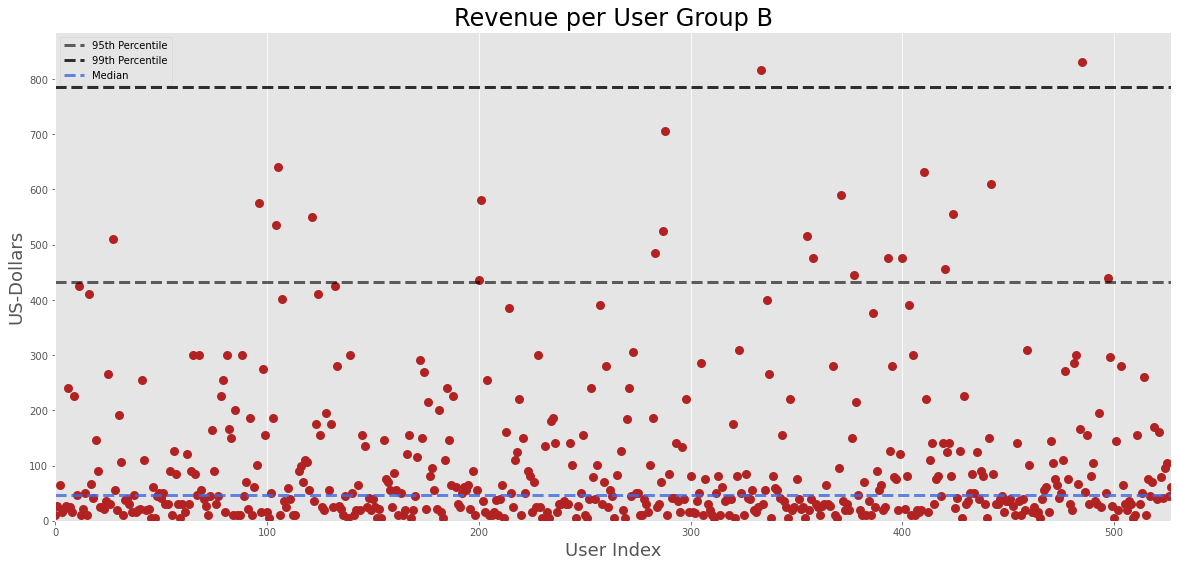

95th Percentile (Overall): 429.74
99th Percentile (Overall): 830.3


In [30]:
orders_prices= orders.groupby(['group','visitorId']).agg({'revenue':'mean'}).reset_index()

orders_prices.columns= ['group', 'visitor','revenue']


orders_pricesA= orders_prices.query('group== "A"').reset_index(drop= True)
orders_pricesB= orders_prices.query('group== "B"').reset_index(drop= True)



fig, ax= plt.subplots(figsize= (20,9))
y=np.arange(0,len(orders_prices))

perc95= np.repeat(orders_prices['revenue'].quantile(0.95), len(orders_prices))
perc99= np.repeat(orders_prices['revenue'].quantile(0.99), len(orders_prices))
median= np.repeat(orders_prices['revenue'].median(),len(orders_prices))

ax.plot(y, perc95, '--', color= 'black',alpha= 0.6, linewidth= 3,\
       label= '95th Percentile')
ax.plot(y, perc99, '--', color= 'black', alpha= 0.8,linewidth= 3,\
       label= '99th Percentile')
ax.plot(y, median, '--', color= 'royalblue', alpha= 0.8,linewidth= 3,\
       label= 'Median')
ax.scatter(y, orders_prices['revenue'], color= 'cornflowerblue',\
            linewidths= 3)

ax.set_ylabel('US-Dollars', size= 18)
ax.set_xlabel('User Index', size= 18)

ax.yaxis.grid()
plt.xlim(min(y),max(y))
plt.ylim(0, perc99.mean()+100)
plt.title('Revenue per User', size= 24)
plt.legend()
plt.show()

fig, ax= plt.subplots(figsize= (20,9))
y=np.arange(0,len(orders_pricesA))

perc95A= np.repeat(orders_pricesA['revenue'].quantile(0.95), len(orders_pricesA))
perc99A= np.repeat(orders_pricesA['revenue'].quantile(0.99), len(orders_pricesA))
medianA= np.repeat(orders_pricesA['revenue'].median(),len(orders_pricesA))

ax.plot(y, perc95A, '--', color= 'black',alpha= 0.6, linewidth= 3,\
       label= '95th Percentile')
ax.plot(y, perc99A, '--', color= 'black', alpha= 0.8,linewidth= 3,\
       label= '99th Percentile')
ax.plot(y, medianA, '--', color= 'royalblue', alpha= 0.8,linewidth= 3,\
       label= 'Median')
ax.scatter(y, orders_pricesA['revenue'], color= 'seagreen',\
            linewidths= 3)

ax.set_ylabel('US-Dollars', size= 18)
ax.set_xlabel('User Index', size= 18)

ax.yaxis.grid()
plt.xlim(min(y),max(y))
plt.ylim(0, perc99A.mean()+100)
plt.title('Revenue per User Group A', size= 24)
plt.legend()
plt.show()

fig, ax= plt.subplots(figsize= (20,9))
y=np.arange(0,len(orders_pricesB))

perc95B= np.repeat(orders_pricesB['revenue'].quantile(0.95), len(orders_pricesB))
perc99B= np.repeat(orders_pricesB['revenue'].quantile(0.99), len(orders_pricesB))
medianB= np.repeat(orders_pricesB['revenue'].median(),len(orders_pricesB))


ax.plot(y, perc95B, '--', color= 'black',alpha= 0.6, linewidth= 3,\
       label= '95th Percentile')
ax.plot(y, perc99B, '--', color= 'black', alpha= 0.8,linewidth= 3,\
       label= '99th Percentile')
ax.plot(y, medianB, '--', color= 'royalblue', alpha= 0.8,linewidth= 3,\
       label= 'Median')
ax.scatter(y, orders_pricesB['revenue'], color= 'firebrick',\
            linewidths= 3)
ax.yaxis.grid()
ax.set_ylabel('US-Dollars', size= 18)
ax.set_xlabel('User Index', size= 18)

plt.xlim(min(y),max(y))
plt.ylim(0, perc99B.mean()+100)
plt.title('Revenue per User Group B', size= 24)
plt.legend()
plt.show()
print('95th Percentile (Overall):', np.round(max(perc95),2))
print('99th Percentile (Overall):', np.round(max(perc99),2))

Here, I would use the 95th percentile as a barrier and remove all users who spent more than 430 €. 

### Is the Difference in Conversion signifcant? 

Using the raw data, the following part tests the statistical significance of the difference in conversion. To quantify the uncertainty of the estimates, confidence intervals for A and B's conversion rates as well as their difference will be provided. 

In [32]:

pA= conversionA['cum_conversion_rate'].values[30]
pB= conversionB['cum_conversion_rate'].values[30]

p_combined= orders['transactionId'].count()/visits['visits'].sum()

difference= pA-pB
st_error= mt.sqrt(p_combined*(1-p_combined)*(1/conversionA['cum_visits'][30]+1/conversionB['cum_visits'][30]))

z_value= difference/st_error

distr= st.norm(0,1)
z_value

p_value= (distr.cdf(z_value))

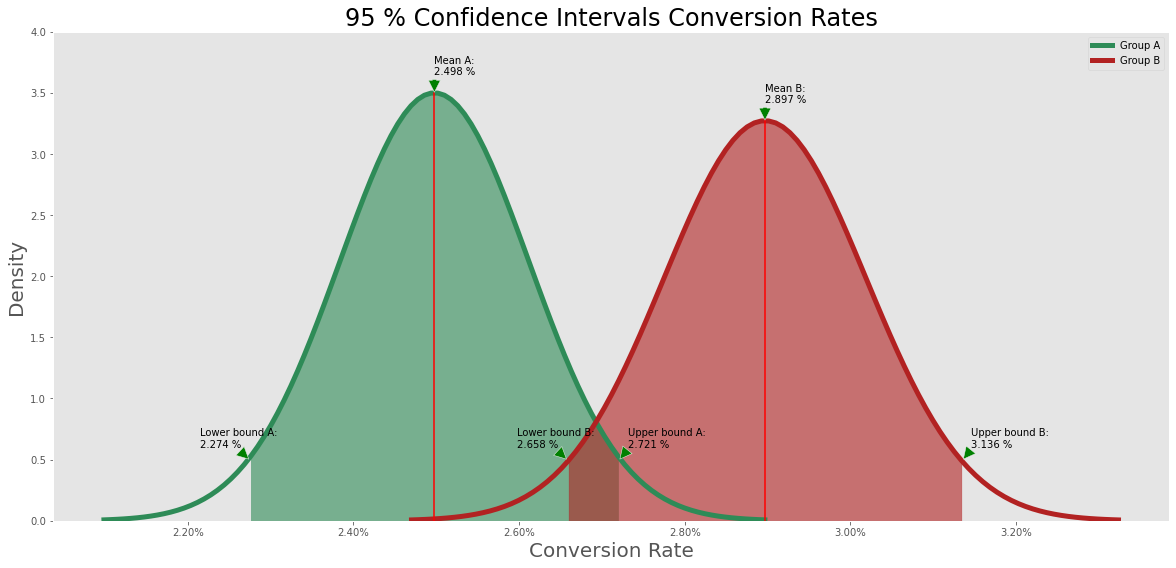

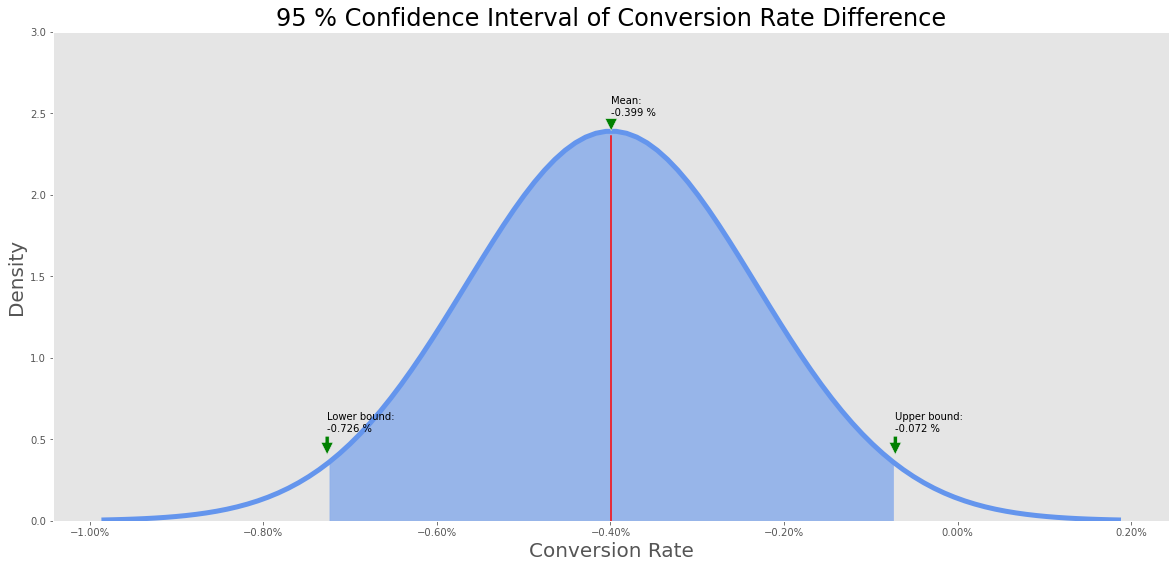

p-value of difference between A and B: 0.008


In [33]:
fig, ax= plt.subplots(figsize= (20,9))
critical_value= distr.ppf(0.975)
sigma_a=mt.sqrt(pA*(1-pA)/conversionA['cum_visits'][30])
sigma_b= mt.sqrt(pB*(1-pB)/conversionB['cum_visits'][30])
x = np.linspace(pA - 3.5*sigma_a, pA + 3.5*sigma_a, 100)
x1 = np.linspace(pB - 3.5*sigma_b, pB + 3.5*sigma_b, 100)
y= st.norm.pdf(x*100, pA*100, sigma_a*100)
y1= st.norm.pdf(x1*100, pB*100, sigma_b*100)
plt.style.use('ggplot')
ax.plot(x*100, st.norm.pdf(x*100, pA*100, sigma_a*100), color= 'seagreen', linewidth= 5, label= 'Group A')
ax.plot(x1*100, st.norm.pdf(x1*100, pB*100, sigma_b*100), color= 'firebrick', linewidth= 5, label= 'Group B')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
y_max= max(ax.get_yticks())
plt.ylim(0,max(ax.get_yticks()))
ax.set_title('95 % Confidence Intervals Conversion Rates', size= 24)
ax.axvline(pA*100, color= 'red', ymax= y.max()/y_max)
ax.axvline(pB*100,color= 'red', ymax= y1.max()/y_max)

ax.fill_between(x*100, y, where= (x <= pA+critical_value*sigma_a) &(x >= pA-critical_value*sigma_a), color= 'seagreen', alpha= 0.6)
ax.fill_between(x1*100, y1, where= (x1 <= pB+critical_value*sigma_b) &(x1 >= pB-critical_value*sigma_b), color= 'firebrick', alpha= 0.6)
plt.legend()
upperA= (pA+critical_value*sigma_a)*100
lowerA= (pA-critical_value*sigma_a)*100
upperB= (pB+critical_value*sigma_b)*100
lowerB= (pB-critical_value*sigma_b)*100


ax.set_xlabel('Conversion Rate', size= 20)
ax.annotate('Lower bound A:\n{low} %'.format(low=np.round((pA-critical_value*sigma_a)*100,3)),xy= (lowerA,0.5),xytext=(lowerA-0.06, 0.6),arrowprops = dict(facecolor ='green',shrink= 0.05))
ax.annotate('Upper bound A:\n{low} %'.format(low=np.round((pA+critical_value*sigma_a)*100,3)),xy= (upperA,0.5),xytext=(upperA+0.01, 0.6),arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('Lower bound B:\n{low} %'.format(low=np.round((pB-critical_value*sigma_b)*100,3)),xy= (lowerB,0.5),xytext=(lowerB-0.06, 0.6),arrowprops = dict(facecolor ='green',shrink= 0.05))
ax.annotate('Upper bound B:\n{low} %'.format(low=np.round((pB+critical_value*sigma_b)*100,3)),xy= (upperB,0.5),xytext=(upperB+0.01, 0.6),arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('Mean A:\n{low} %'.format(low=np.round(pA*100,3)),xy= (pA*100,y.max()),xytext=((pA*100), y.max()+0.15),arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('Mean B:\n{low} %'.format(low=np.round(pB*100,3)),xy= (pB*100,y1.max()),xytext=((pB*100), y1.max()+0.15),arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.grid(b= None)
ax.set_ylabel('Density', size= 20)
plt.show()

fig, ax= plt.subplots(figsize=(20,9))
critical_value= distr.ppf(0.975)
sigma_diff= mt.sqrt(pA*(1-pA)/conversionA['cum_visits'][30] + \
                       pB*(1-pB)/conversionB['cum_visits'][30])

x3= np.linspace(difference - 3.5*sigma_diff, difference + 3.5*sigma_diff, 100)
y3=  st.norm.pdf(x3*100, difference*100, sigma_diff*100)

plt.plot(x3*100,y3,linewidth= 5, color= 'cornflowerblue')
ax.set_title('95 % Confidence Interval of Conversion Rate Difference', size= 24)
ax.set_xlabel('Conversion Rate', size= 20)
ax.grid(b= None)
ax.set_ylabel('Density', size= 20)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.fill_between(x3*100, y3, where= (x3 <= difference+critical_value*sigma_diff) &(x3 >= difference-critical_value*sigma_diff), color= 'cornflowerblue', alpha= 0.6)
upper= (difference+critical_value*sigma_diff)*100
lower= (difference-critical_value*sigma_diff)*100

ax.annotate('Lower bound:\n{low} %'.format(low=np.round((difference-critical_value*sigma_diff)*100,3)),xy= (lower,0.4),xytext=(lower, 0.55),arrowprops = dict(facecolor ='green',shrink= 0.05))
ax.annotate('Upper bound:\n{low} %'.format(low=np.round((difference+critical_value*sigma_diff)*100,3)),xy= (upper,0.4),xytext=(upper, 0.55),arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('Mean:\n{low} %'.format(low=np.round(difference*100,3)),xy= (difference*100,y3.max()),xytext=(difference*100, y3.max()+0.1),arrowprops = dict(facecolor ='green',shrink = 0.05))

y_max= max(ax.get_yticks())
ax.axvline(difference*100,color= 'red', ymax= y3.max()/y_max-0.01)
plt.ylim(0,max(ax.get_yticks()))
plt.show()

print('p-value of difference between A and B: {0:.3f}'.format(p_value))

The results show that the difference between both groups' conversion rates is significant with a p-value of 0.8%. However, when looking at the confidence intervals of the individual groups, we can see that they overlap. While this does not mean that it is likely to see A perform better than B, the confidence interval of the difference shows that it is possible that A is only marginally worse than B (upper bound: -0.072%). Nevertheless from this data, we can be confident that the campaign is likely to boost conversion rates.

### Is the difference in Average Purchase Size Significant? 

In the following part, I'm going to test the significance of the difference in average pruchase size. To do so, a typical hypothesis test that compares the means of both groups is conducted. However, before selecting the procedure, both distributions will be tested for normality using histograms, qq-plots and Shapiro-Wilk tests. Given the scatter plot above, this is very unlikely but it's still worth validating this observation statistically. If the distributions turn out non-Gaussian, I will use the Wilcoxon-Mann-Whitney-U test. Since this test is based on ranks rather than the actual scores of the samples, it is also robust towards outliers. Under these circumstances, it might be possible that the tests between the raw data and filtered data won't differ all too much. Note that the test will ignore the users with 0 purchases and only compares the ones with more purchases. 

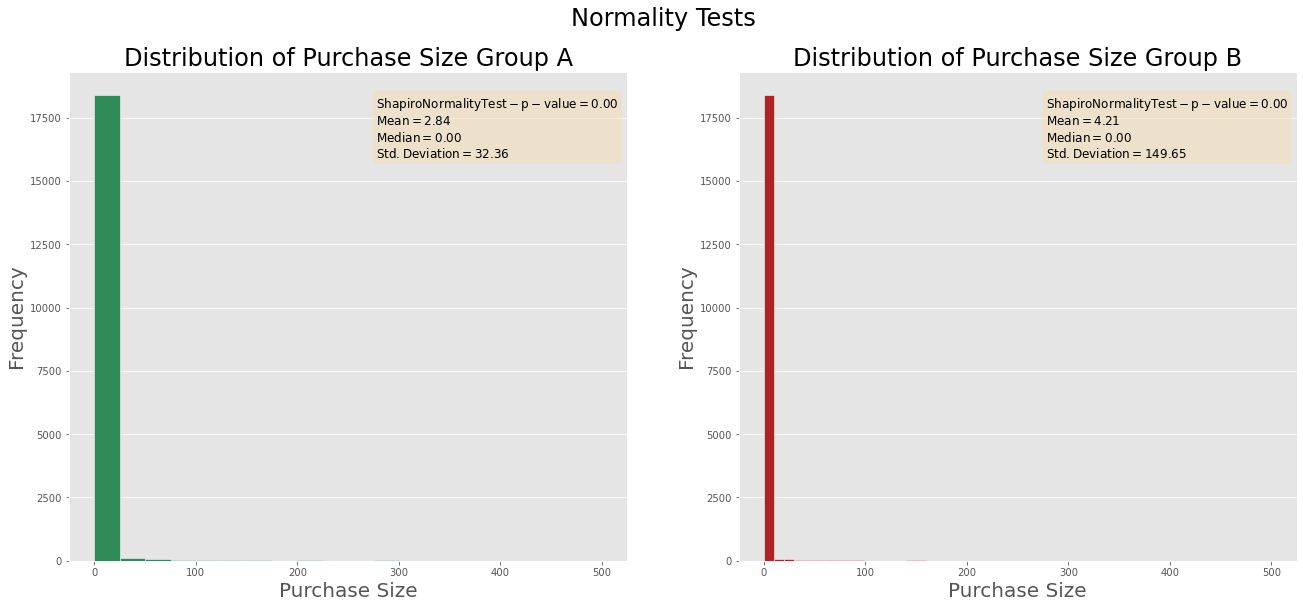

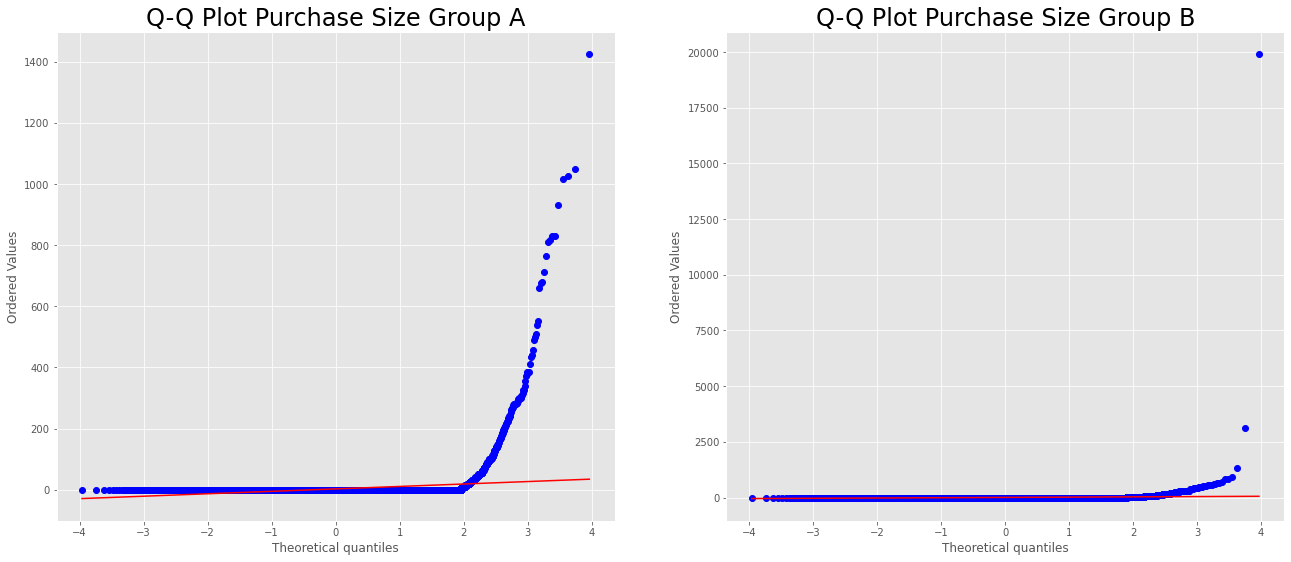

In [63]:
alpha= 0.05 

A_purch= orders.query('group == "A"')['revenue']
B_purch= orders.query('group == "B"')['revenue']
extraA= np.repeat(0,visits.query('group == "A"')['visits'].sum()-len(A_purch))
A_purch= pd.concat([A_purch,pd.Series(extraA)])
extraB= np.repeat(0,visits.query('group == "B"')['visits'].sum()-len(B_purch))
B_purch= pd.concat([B_purch,pd.Series(extraB)])


resultsA= st.shapiro(A_purch)
resultsB= st.shapiro(B_purch)

fig, [ax1,ax2]= plt.subplots(1,2,figsize= (22,9))

plt.suptitle('Normality Tests', size= 24)



ax1.hist(A_purch,bins= 20, range= (0,500), color= 'seagreen',ec= 'white', density= False)
ax1.set_title('Distribution of Purchase Size Group A', size= 24)
ax1.set_ylabel('Frequency', size= 20)
ax1.set_xlabel('Purchase Size', size= 20)
ax1.xaxis.grid()

a_mean= np.round(A_purch.mean(),2)
a_median= np.round(A_purch.median(),2)
a_std= np.round(A_purch.std(),2)
textstr = '\n'.join((
    r'$\mathrm{Shapiro Normality Test- p-value}=%.2f$'% (np.round((resultsA.pvalue),3) ),
    r'$\mathrm{Mean}=%.2f$' % (a_mean, ),
    r'$\mathrm{Median}=%.2f$' % (a_median, ),
    r'$\mathrm{Std.Deviation}=%.2f$' % (a_std, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.55, 0.95, textstr, transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)


ax2.hist(B_purch,bins= 50, range= (0,500), color= 'firebrick', ec= 'white',density= False)
ax2.set_title('Distribution of Purchase Size Group B', size= 24)
ax2.set_ylabel('Frequency', size= 20)
ax2.set_xlabel('Purchase Size', size= 20)
ax2.xaxis.grid()
b_mean= np.round(B_purch.mean(),2)
b_median= np.round(B_purch.median(),2)
b_std= np.round(B_purch.std(),2)

textstr = '\n'.join((
    r'$\mathrm{Shapiro Normality Test- p-value}=%.2f$'% (np.round((resultsB.pvalue),3) ),
    r'$\mathrm{Mean}=%.2f$' % (b_mean, ),
    r'$\mathrm{Median}=%.2f$' % (b_median, ),
    r'$\mathrm{Std.Deviation}=%.2f$' % (b_std, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax2.text(0.55, 0.95, textstr, transform=ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)



plt.show()

fig, [ax1,ax2]= plt.subplots(1,2,figsize= (22,9))
plt.subplot(ax1)
st.probplot(A_purch, dist="norm", plot= plt)
ax1.set_title('Q-Q Plot Purchase Size Group A', size= 24)
plt.subplot(ax2)
st.probplot(B_purch, dist="norm", plot= plt)
ax2.set_title('Q-Q Plot Purchase Size Group B', size= 24)

plt.show()

The data is strongly skewed and and the variance and mean are severely affected by one outlier who made a purchase of 20000 USD. Under these conditions only a rank-based test will be of any use. 

In [191]:
ranks= orders.sort_values('revenue')[['revenue','group']].reset_index(drop= True)

purchases= orders.groupby(['date','group']).agg({'visitorId':'count'}).reset_index().sort_values('group')

for i in np.arange(0,len(visits)):
    extra= pd.DataFrame({'revenue': np.repeat(0, visits['visits'][i]-purchases['visitorId'][i]),
                        'group': np.repeat(visits['group'][i], visits['visits'][i]-purchases['visitorId'][i])})
    ranks= pd.concat([ranks, extra],axis=0)
    
ranks['ranks']= np.arange(1, len(ranks)+1,1)
ranks['ranks']= ranks.groupby('revenue')['ranks'].transform('mean')

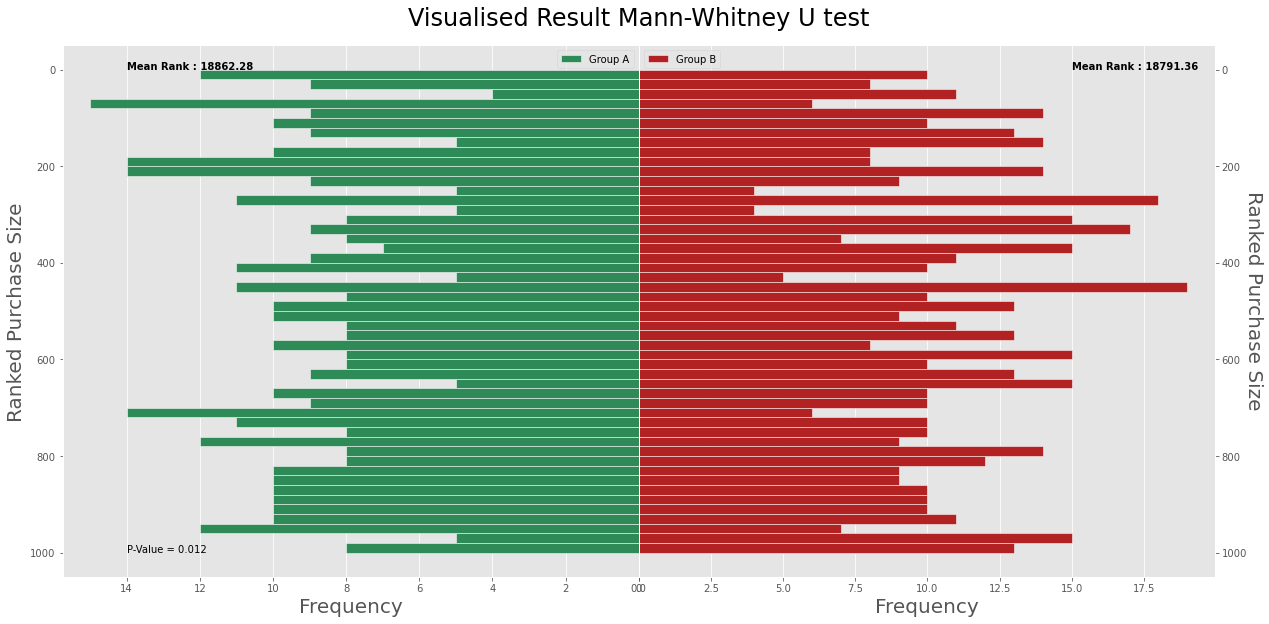

In [192]:
A_rank= ranks.query('group== "A"')['ranks']
B_rank= ranks.query('group== "B"')['ranks']
fig= plt.figure(figsize= (20,9))
ax1= fig.add_axes([0.1,0.1,0.4,0.82])
ax2= fig.add_axes([0.5,0.1,0.4,0.82])
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.hist(A_rank,bins= 50, range= (0,1000), color= 'seagreen', orientation= 'horizontal',density= False,ec= 'white',label= 'Group A')
ax2.hist(B_rank,bins= 50, range= (0,1000), color= 'firebrick',  orientation= 'horizontal', density= False,ec= 'white', label= 'Group B')
ax2.yaxis.set_ticks_position('right')

plt.suptitle('Visualised Result Mann-Whitney U test', size= 24) 

ax1.annotate('Mean Rank : {mean}'.format(mean= np.round(A_rank.mean(),2)),xy=(14,0), weight= 'bold')
ax2.annotate('Mean Rank : {mean}'.format(mean= np.round(B_rank.mean(),2)),xy=(15,0), weight= 'bold')
#ax2.axhline(B_rank.mean(), color= 'black', linewidth= 3)
#ax1.axhline(A_rank.mean(), color= 'black', linewidth= 3)
ax1.legend(loc= 'upper right')
ax2.legend(loc= 'upper left')
ax1.set_ylabel('Ranked Purchase Size', size= 20)
ax2.set_ylabel('Ranked Purchase Size', size= 20, rotation= 270)
ax1.set_xlabel('Frequency', size= 20)
ax2.set_xlabel('Frequency', size= 20)
ax2.invert_yaxis()
ax2.yaxis.set_label_coords(1.05,0.52)
ax2.yaxis.grid()
ax1.yaxis.grid()


results= st.mannwhitneyu(A_rank, B_rank)

labels= []
labels.append("P-Value = {0:.4g}".format(np.round(results.pvalue,3)))
labels.append("Mean Rank A = {0:.4g}".format(np.round(A_rank.mean(),3)))
labels.append("Mean Rank B = {0:.4g}".format(np.round(B_rank.mean(),3)))

ax1.annotate("P-Value = {0:.4g}".format(np.round(results.pvalue,3)),xy= (14,1000))
plt.show()
#print('P-Value: ',results.pvalue)

The Mann-Whitney U test shows significant p-values of 1.2%. While the mean ranks cannot be properly visualised on the plot, A has fared considerably better than B in terms of average purchase size. 

### Conversion Rate Filtered Data Set

The same analyses will now be done with a filtered dataset. As for conversion rates, all users who ordered more than one item will be removed from the dataset. 

In [43]:
abnormalUser= orders_per_user.query('orders >= 2')['visitor']
ordersFilt= orders.query('visitorId not in @abnormalUser')

#orders_by_userA= 
#conversionFilt= orders.merge(visits, on= ['date', 'group'])
#conversionFilt
#no_ordersFilt= ordersFilt.groupby(['date','group']).agg({'transactionId':'count', 'visitorId':'nunique'})
#ordersFilt[ordersFilt[['visitorId','date']].duplicated()]

no_ordersFilt= ordersFilt.groupby(['date', 'group']).agg({'transactionId':'count'}).reset_index()

a_visits= visits.query('group == "A"')['visits'].sum()
b_visits= visits.query('group == "B"')['visits'].sum()

pA= len(ordersFilt.query('group == "A"'))/a_visits
pB= len(ordersFilt.query('group == "B"'))/b_visits

difference= pA-pB
p_combined= len(ordersFilt)/visits.visits.sum()

st_error= mt.sqrt(p_combined*(1-p_combined)*(1/a_visits+1/b_visits))

z_value= difference/st_error

distr= st.norm(0,1)
z_value

p_value= (distr.cdf(z_value))

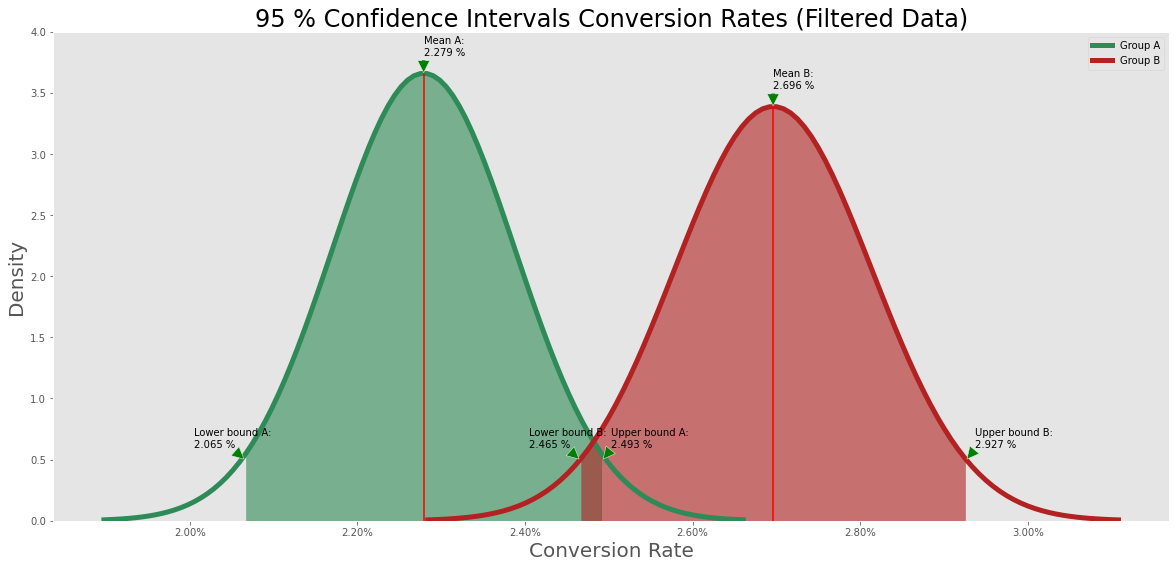

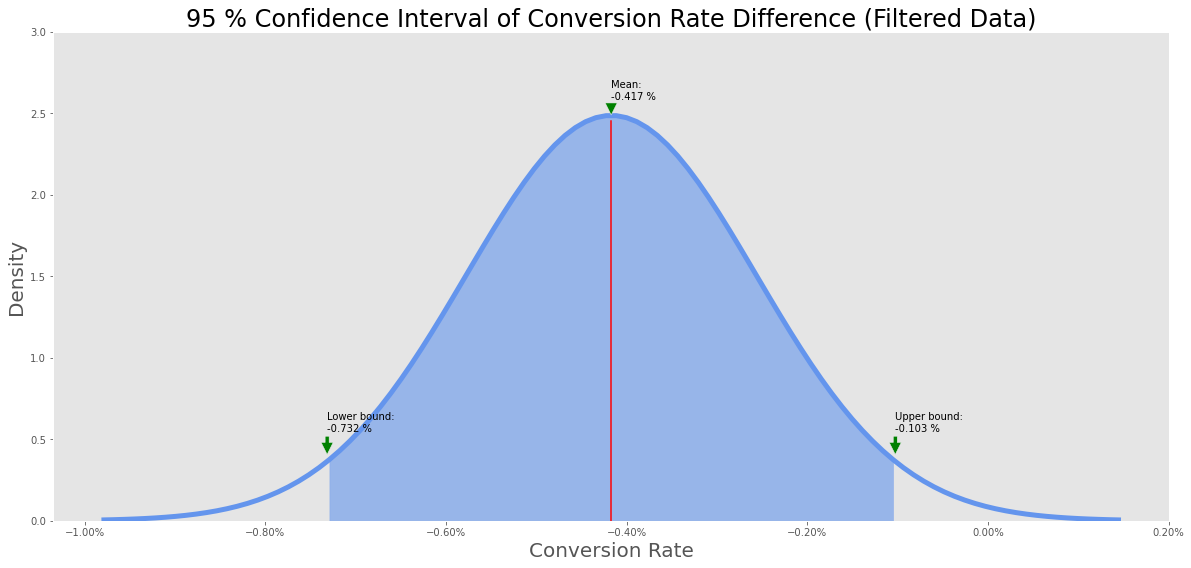

p-value of difference between A and B: 0.005


In [40]:
fig, ax= plt.subplots(figsize= (20,9))
critical_value= distr.ppf(0.975)
sigma_a=mt.sqrt(pA*(1-pA)/a_visits)
sigma_b= mt.sqrt(pB*(1-pB)/b_visits)
x = np.linspace(pA - 3.5*sigma_a, pA + 3.5*sigma_a, 100)
x1 = np.linspace(pB - 3.5*sigma_b, pB + 3.5*sigma_b, 100)
y= st.norm.pdf(x*100, pA*100, sigma_a*100)
y1= st.norm.pdf(x1*100, pB*100, sigma_b*100)
plt.style.use('ggplot')
ax.plot(x*100, st.norm.pdf(x*100, pA*100, sigma_a*100), color= 'seagreen', linewidth= 5, label= 'Group A')
ax.plot(x1*100, st.norm.pdf(x1*100, pB*100, sigma_b*100), color= 'firebrick', linewidth= 5, label= 'Group B')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
y_max= max(ax.get_yticks())
plt.ylim(0,max(ax.get_yticks()))
ax.set_title('95 % Confidence Intervals Conversion Rates (Filtered Data)', size= 24)
ax.axvline(pA*100, color= 'red', ymax= y.max()/y_max)
ax.axvline(pB*100,color= 'red', ymax= y1.max()/y_max)
#ax.axvline(pA*100+critical_value*sigma_a*100, color= 'red', ymax= y1.max()/y_max)

ax.grid(b= None)
ax.set_ylabel('Density', size= 20)
ax.fill_between(x*100, y, where= (x <= pA+critical_value*sigma_a) &(x >= pA-critical_value*sigma_a), color= 'seagreen', alpha= 0.6)
ax.fill_between(x1*100, y1, where= (x1 <= pB+critical_value*sigma_b) &(x1 >= pB-critical_value*sigma_b), color= 'firebrick', alpha= 0.6)
plt.legend()
upperA= (pA+critical_value*sigma_a)*100
lowerA= (pA-critical_value*sigma_a)*100
upperB= (pB+critical_value*sigma_b)*100
lowerB= (pB-critical_value*sigma_b)*100


ax.set_xlabel('Conversion Rate', size= 20)
ax.annotate('Lower bound A:\n{low} %'.format(low=np.round((pA-critical_value*sigma_a)*100,3)),xy= (lowerA,0.5),xytext=(lowerA-0.06, 0.6),arrowprops = dict(facecolor ='green',shrink= 0.05))
ax.annotate('Upper bound A:\n{low} %'.format(low=np.round((pA+critical_value*sigma_a)*100,3)),xy= (upperA,0.5),xytext=(upperA+0.01, 0.6),arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('Lower bound B:\n{low} %'.format(low=np.round((pB-critical_value*sigma_b)*100,3)),xy= (lowerB,0.5),xytext=(lowerB-0.06, 0.6),arrowprops = dict(facecolor ='green',shrink= 0.05))
ax.annotate('Upper bound B:\n{low} %'.format(low=np.round((pB+critical_value*sigma_b)*100,3)),xy= (upperB,0.5),xytext=(upperB+0.01, 0.6),arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('Mean A:\n{low} %'.format(low=np.round(pA*100,3)),xy= (pA*100,y.max()),xytext=((pA*100), y.max()+0.15),arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('Mean B:\n{low} %'.format(low=np.round(pB*100,3)),xy= (pB*100,y1.max()),xytext=((pB*100), y1.max()+0.15),arrowprops = dict(facecolor ='green',shrink = 0.05))

plt.show()

fig, ax= plt.subplots(figsize=(20,9))
critical_value= distr.ppf(0.975)
sigma_diff= mt.sqrt(pA*(1-pA)/a_visits + \
                       pB*(1-pB)/b_visits)


#difference
#st_error_diff

x3= np.linspace(difference - 3.5*sigma_diff, difference + 3.5*sigma_diff, 100)
y3=  st.norm.pdf(x3*100, difference*100, sigma_diff*100)

plt.plot(x3*100,y3,linewidth= 5, color= 'cornflowerblue')
ax.set_title('95 % Confidence Interval of Conversion Rate Difference (Filtered Data)', size= 24)
ax.set_xlabel('Conversion Rate', size= 20)
ax.grid(b= None)
ax.set_ylabel('Density', size= 20)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.fill_between(x3*100, y3, where= (x3 <= difference+critical_value*sigma_diff) &(x3 >= difference-critical_value*sigma_diff), color= 'cornflowerblue', alpha= 0.6)
upper= (difference+critical_value*sigma_diff)*100
lower= (difference-critical_value*sigma_diff)*100

ax.annotate('Lower bound:\n{low} %'.format(low=np.round((difference-critical_value*sigma_diff)*100,3)),xy= (lower,0.4),xytext=(lower, 0.55),arrowprops = dict(facecolor ='green',shrink= 0.05))
ax.annotate('Upper bound:\n{low} %'.format(low=np.round((difference+critical_value*sigma_diff)*100,3)),xy= (upper,0.4),xytext=(upper, 0.55),arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('Mean:\n{low} %'.format(low=np.round(difference*100,3)),xy= (difference*100,y3.max()),xytext=(difference*100, y3.max()+0.1),arrowprops = dict(facecolor ='green',shrink = 0.05))

y_max= max(ax.get_yticks())
ax.axvline(difference*100,color= 'red', ymax= y3.max()/y_max-0.01)
plt.ylim(0,max(ax.get_yticks()))
plt.show()

print('p-value of difference between A and B: {0:.3f}'.format(p_value))

Removing anomalous users resulted in a lower p-value and a narrower confidence interval of absolute differences [-0.732%, -0.103%]. This insight boosts our confidence that relative imporvements between 10 and 20 % in conversion are within the realm of possibility. 

### Average Purchase Size Filtered Data Set

Concerning average purchase size, I will remove those visitors who spent more than 430 USD as this covers 95% of all users. 

In [44]:
abnormal_price= orders_prices.query('revenue >= 400')['visitor']

pricesFilt= orders.query('visitorId not in @abnormal_price')

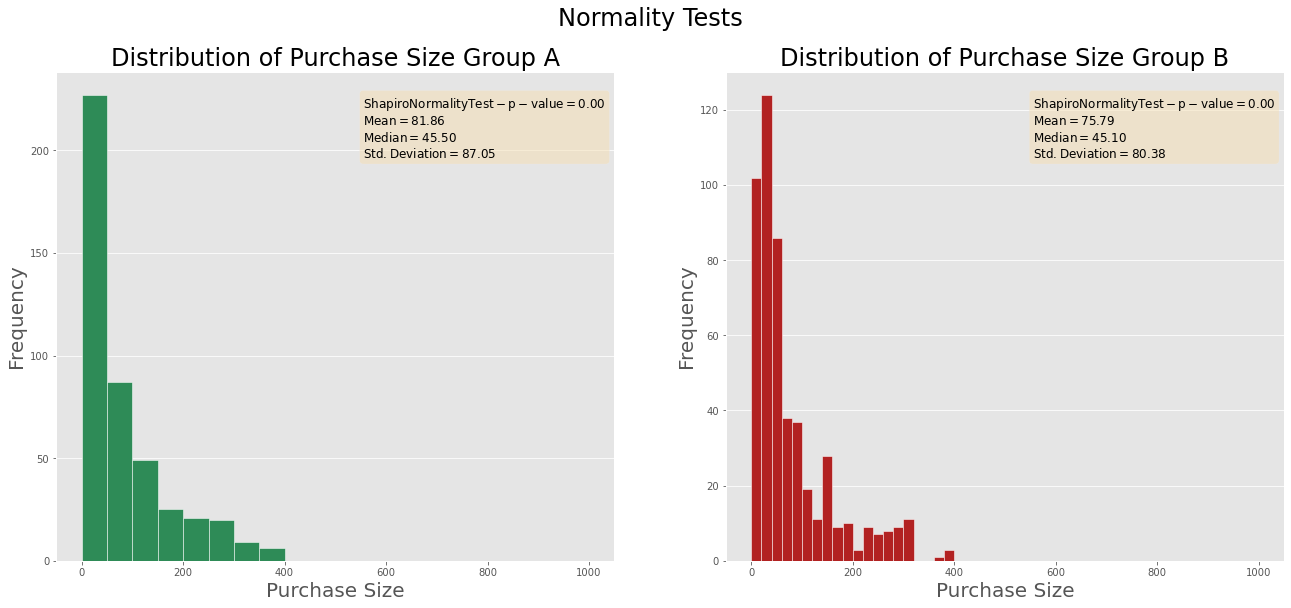

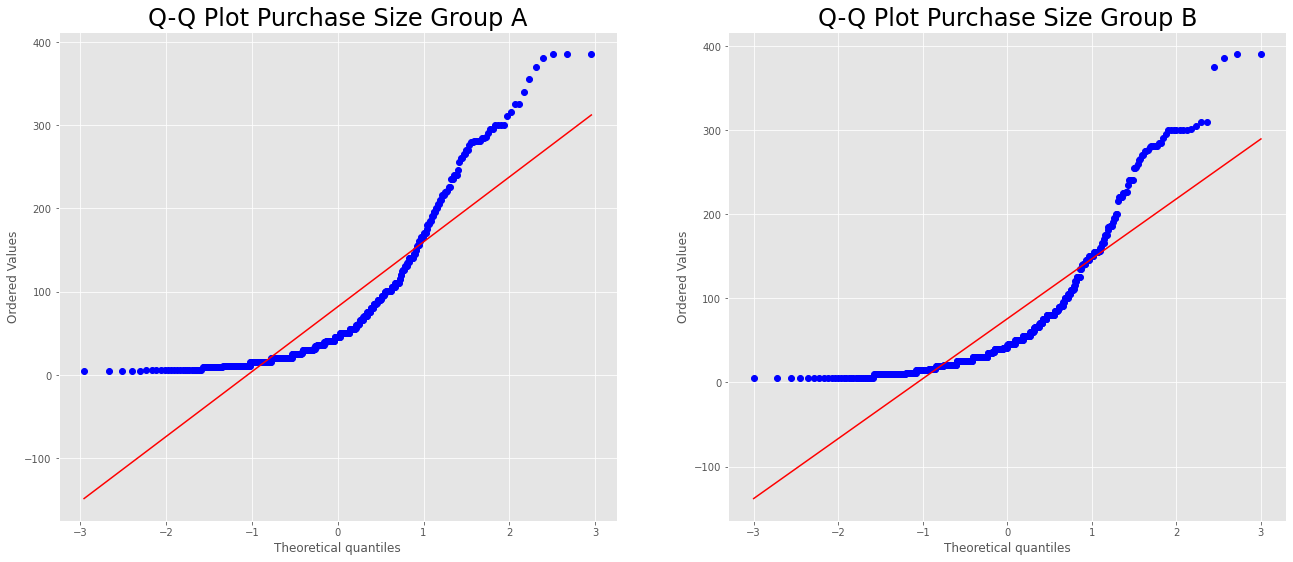

In [45]:
alpha= 0.05 

A_purch= pricesFilt.query('group == "A"')['revenue']
B_purch= pricesFilt.query('group == "B"')['revenue']
resultsA= st.shapiro(A_purch)
resultsB= st.shapiro(B_purch)

fig, [ax1,ax2]= plt.subplots(1,2,figsize= (22,9))

plt.suptitle('Normality Tests', size= 24)

ax1.hist(A_purch,bins= 20, range= (0,1000), color= 'seagreen',ec= 'white', density= False)
ax1.set_title('Distribution of Purchase Size Group A', size= 24)
ax1.set_ylabel('Frequency', size= 20)
ax1.set_xlabel('Purchase Size', size= 20)
a_mean= np.round(A_purch.mean(),2)
a_median= np.round(A_purch.median(),2)
a_std= np.round(A_purch.std(),2)
textstr = '\n'.join((
    r'$\mathrm{Shapiro Normality Test- p-value}=%.2f$'% (np.round((resultsA.pvalue),3) ),
    r'$\mathrm{Mean}=%.2f$' % (a_mean, ),
    r'$\mathrm{Median}=%.2f$' % (a_median, ),
    r'$\mathrm{Std.Deviation}=%.2f$' % (a_std, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(0.55, 0.95, textstr, transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)


ax2.hist(B_purch,bins= 50, range= (0,1000), color= 'firebrick', ec= 'white',density= False)
ax2.set_title('Distribution of Purchase Size Group B', size= 24)
ax2.set_ylabel('Frequency', size= 20)
ax2.set_xlabel('Purchase Size', size= 20)
b_mean= np.round(B_purch.mean(),2)
b_median= np.round(B_purch.median(),2)
b_std= np.round(B_purch.std(),2)
textstr = '\n'.join((
    r'$\mathrm{Shapiro Normality Test- p-value}=%.2f$'% (np.round((resultsB.pvalue),3) ),
    r'$\mathrm{Mean}=%.2f$' % (b_mean, ),
    r'$\mathrm{Median}=%.2f$' % (b_median, ),
    r'$\mathrm{Std.Deviation}=%.2f$' % (b_std, )))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax2.text(0.55, 0.95, textstr, transform=ax2.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)


ax1.xaxis.grid()
ax2.xaxis.grid()

plt.show()

fig, [ax1,ax2]= plt.subplots(1,2,figsize= (22,9))
plt.subplot(ax1)
st.probplot(A_purch, dist="norm", plot= plt)
ax1.set_title('Q-Q Plot Purchase Size Group A', size= 24)
plt.subplot(ax2)
st.probplot(B_purch, dist="norm", plot= plt)
ax2.set_title('Q-Q Plot Purchase Size Group B', size= 24)


plt.show()

After removing the outliers, the distributions of both groups now look very similar. Let's see how this affects the significance of their difference.

In [ ]:
ranks= pricesFilt.sort_values('revenue')[['revenue','group']].reset_index(drop= True)

purchases= pricesFilt.groupby(['date','group']).agg({'visitorId':'count'}).reset_index().sort_values('group')

for i in np.arange(0,len(visits)):
    extra= pd.DataFrame({'revenue': np.repeat(0, visits['visits'][i]-purchases['visitorId'][i]),
                        'group': np.repeat(visits['group'][i], visits['visits'][i]-purchases['visitorId'][i])})
    ranks= pd.concat([ranks, extra],axis=0)
    
ranks['ranks']= np.arange(1, len(ranks)+1,1)
ranks['ranks']= ranks.groupby('revenue')['ranks'].transform('mean')

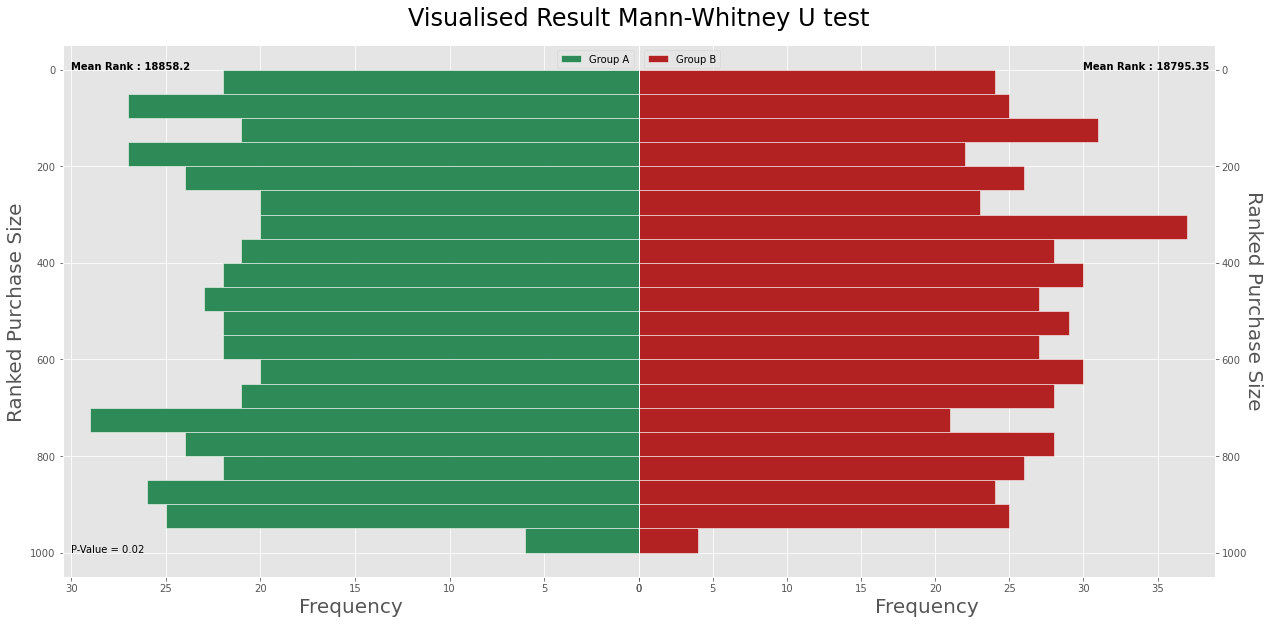

In [189]:
ranks= pricesFilt.sort_values('revenue').reset_index(drop= True)
ranks['ranks']= np.arange(1, len(ranks)+1,1)
ranks['ranks']= ranks.groupby('revenue')['ranks'].transform('mean')

ranks= pricesFilt.sort_values('revenue')[['revenue','group']].reset_index(drop= True)

purchases= pricesFilt.groupby(['date','group']).agg({'visitorId':'count'}).reset_index().sort_values('group')

for i in np.arange(0,len(visits)):
    extra= pd.DataFrame({'revenue': np.repeat(0, visits['visits'][i]-purchases['visitorId'][i]),
                        'group': np.repeat(visits['group'][i], visits['visits'][i]-purchases['visitorId'][i])})
    ranks= pd.concat([ranks, extra],axis=0)
    
ranks['ranks']= np.arange(1, len(ranks)+1,1)
ranks['ranks']= ranks.groupby('revenue')['ranks'].transform('mean')
A_rank= ranks.query('group== "A"')['ranks']
B_rank= ranks.query('group== "B"')['ranks']
fig= plt.figure(figsize= (20,9))
ax1= fig.add_axes([0.1,0.1,0.4,0.82])
ax2= fig.add_axes([0.5,0.1,0.4,0.82])
ax1.invert_xaxis()
ax1.invert_yaxis()
ax1.hist(A_rank,bins= 20, range= (0,1000), color= 'seagreen', orientation= 'horizontal',density= False,ec= 'white',label= 'Group A')
ax2.hist(B_rank,bins= 20, range= (0,1000), color= 'firebrick',  orientation= 'horizontal', density= False,ec= 'white', label= 'Group B')
ax2.yaxis.set_ticks_position('right')

plt.suptitle('Visualised Result Mann-Whitney U test', size= 24) # or plt.suptitle('Main title')

ax1.annotate('Mean Rank : {mean}'.format(mean= np.round(A_rank.mean(),2)),xy=(30,0), weight= 'bold')
ax2.annotate('Mean Rank : {mean}'.format(mean= np.round(B_rank.mean(),2)),xy=(30,0), weight= 'bold')
#ax2.axhline(B_rank.mean(), color= 'black', linewidth= 3)
#ax1.axhline(A_rank.mean(), color= 'black', linewidth= 3)
ax1.legend(loc= 'upper right')
ax2.legend(loc= 'upper left')
ax1.set_ylabel('Ranked Purchase Size', size= 20)
ax2.set_ylabel('Ranked Purchase Size', size= 20, rotation= 270)
ax1.set_xlabel('Frequency', size= 20)
ax2.set_xlabel('Frequency', size= 20)
ax2.invert_yaxis()
ax2.yaxis.set_label_coords(1.05,0.52)

results= st.mannwhitneyu(A_rank, B_rank)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2
labels= []
labels.append("P-Value = {0:.4g}".format(np.round(results.pvalue,3)))
labels.append("Mean Rank A = {0:.4g}".format(np.round(A_rank.mean(),3)))
labels.append("Mean Rank B = {0:.4g}".format(np.round(B_rank.mean(),3)))

ax1.annotate("P-Value = {0:.4g}".format(np.round(results.pvalue,3)),xy= (30,1000))
plt.show()

Removing the outliers resulted in a slightly higher p-value. The results are still in favour of Group A. 

# Conclusion 

This report has shown that the B-Variant of the website could significantly improve the conversion rates of the page (relative difference of 13.78% by the end of the test). As such, the test can be terminated at this point. Regarding average purchase size, it seems that B is not really contributing to improvements of the website. Judging from the median, A is performing even better. However before jumping to conclusion it is important to note that it's mean value has not yet stabilised due to a severe outlier (20000 USD purchase). Then again, the current numbers already give a first indication that the B-variant did not really result in higher purchase sizes. It is now up to the management to balance out the potential costs incurred by continuing the test and the potential gains to be achieved. 